In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
main_path_trainval = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
main_path_test = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'
img_size = (64, 64)
batch_size = 64


In [ ]:
import tensorflow as tf
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

Xtrain = tf.keras.utils.image_dataset_from_directory(
directory ='./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set',
image_size = (64, 64),
validation_split = validation_split,
subset = "training",
seed = seed_train_validation,
shuffle = shuffle_value)

Xval0 = tf.keras.utils.image_dataset_from_directory(
directory ='./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set',
image_size = (64, 64),
validation_split = validation_split,
subset = "validation",
seed = seed_train_validation,
shuffle = shuffle_value)

val_batches = tf.data.experimental.cardinality(Xval0)
Xtest = Xval0.take((2*val_batches) // 4)
Xval = Xval0.skip((2*val_batches) // 4)



Found 2500 files belonging to 5 classes.
Using 2000 files for training.
Found 2500 files belonging to 5 classes.
Using 500 files for validation.


['V', 'W', 'X', 'Y', 'Z']


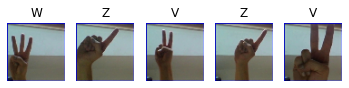

In [ ]:
classes1 = Xtrain.class_names
print(classes1)
N = 5
plt.figure()
for img, lab in Xtest.take(1):
  for i in range(N):
      plt.subplot(1, N, i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(classes1[lab[i]])
      plt.axis('off')

In [ ]:
from keras import layers
from keras import Sequential
data_augmentation = Sequential(
 [
 layers.RandomFlip("horizontal", input_shape=(64, 64, 3)),
 layers.RandomRotation(0.25),
 layers.RandomZoom(0.1),
 ]
)

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.regularizers import l2
from keras import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy 
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
num_classes = len(classes1)


def make_model(drop = 0.2, llr = 0.001):
    model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(drop),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()
    model.compile(Adam(learning_rate=llr),
              loss=SparseCategoricalCrossentropy(),
              metrics='accuracy')
    return model




In [ ]:
model1 = make_model()
history1 = model1.fit(Xtrain,
epochs = 100,
validation_data=Xval,
verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

63/63 [==============================] - 15s 156ms/step - loss: 1.9444 - accuracy: 0.2170 - val_loss: 1.7252 - val_accuracy: 0.2295
Epoch 2/100
63/63 [==============================] - 10s 156ms/step - loss: 1.5702 - accuracy: 0.3450 - val_loss: 1.4577 - val_accuracy: 0.4303
Epoch 3/100
63/63 [==============================] - 10s 155ms/step - loss: 1.3959 - accuracy: 0.4460 - val_loss: 1.2731 - val_accuracy: 0.5328
Epoch 4/100
63/63 [==============================] - 9s 138ms/step - loss: 1.2754 - accuracy: 0.5380 - val_loss: 1.2651 - val_accuracy: 0.5041
Epoch 5/100
63/63 [==============================] - 9s 134ms/step - loss: 1.1854 - accuracy: 0.5665 - val_loss: 1.1974 - val_accuracy: 0.5041
Epoch 6/100
63/63 [==============================] - 10s 147ms/step - loss: 1.1497 - accuracy: 0.5685 - val_loss: 1.2748 - val_accuracy: 0.5123
Epoch 7/100
63/63 [==============================] - 11s 163ms/step - loss: 1.1049 - accuracy: 0.6015 - val_loss: 1.1160 - val_accuracy: 0.5738
Epoch 

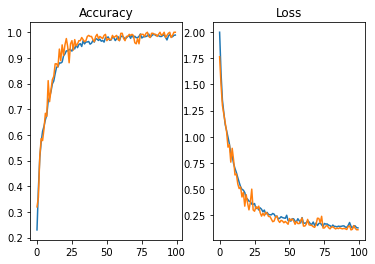

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure()
plt.subplot(121)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.subplot(122)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.show()

In [ ]:
labels = np.array([])
pred = np.array([])
for img, lab in Xtest:
    labels = np.append(labels, lab)
    pred = np.append(pred, np.argmax(model1.predict(img, verbose=0), axis=1))

Tačnost modela na test skupu je: 100.0%


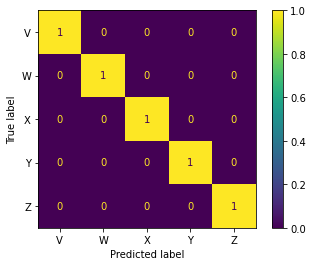

In [ ]:
from sklearn.metrics import accuracy_score
print('Tačnost modela na test skupu je: ' + str(100*accuracy_score(labels, pred)) + '%')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, pred, normalize='true')
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes1)
cmDisplay.plot()
plt.show()

In [ ]:
labels = np.array([])
pred = np.array([])
for img, lab in Xtrain:
    labels = np.append(labels, lab)
    pred = np.append(pred, np.argmax(model1.predict(img, verbose=0), axis=1))

Tačnost modela na train skupu je: 99.95%


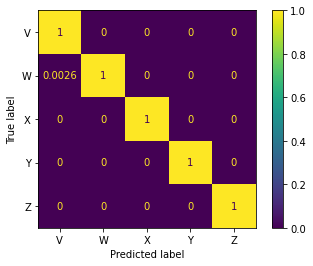

In [ ]:
from sklearn.metrics import accuracy_score
print('Tačnost modela na train skupu je: ' + str(100*accuracy_score(labels, pred)) + '%')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, pred, normalize='true')
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes1)
cmDisplay.plot()
plt.show()

In [ ]:
N = 10
plt.figure()
for img, lab in Xtest.take(1):
  for i in range(N):
      plt.subplot(1, N, i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(classes1[lab[i]])
      plt.axis('off')

In [ ]:
import numpy as np
N = 10
labels = np.array([])
pred = np.array([])
for img, lab in Xtest.take(1):
    for i in range(N):
        labels = np.append(labels, lab)
        pred = np.append(pred, np.argmax(model1.predict(img, verbose=0), axis=1))



NameError: ignored